# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
re_data = pd.read_csv()
re_data.info()
print (re_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Используя метод .info() проведем общий обзор предоставленных данных. Затем посмотрим на них более развернуто, распечатав первые строки датафрейма с использованием функции .head(). Видим что:    

1. Таблица содержит 23699 строк с 22 столбцами.  

2. Полностью заполнены только столбцы 'total_images', 'last_price', 'total_area', 'first_day_exposition','rooms','studio', 'open_plan'.  

3. Данные об общем количестве этажей представленны типом float64. Так как количество этажей всегда целой число, то потребуется преобразование типа. 

4. Данных в столбце 'is_apartment' мало и они должны в результате быть представлены переменной типа bool. Нужна дополнительная обработка.

5. Данные в столбцах 'kitchen_area' и 'balcony' не полны и по ним потребуется дополнительная обработка и заполнение. Значения в столбце 'balcony' представлены типом float64. Так как балконы - могут быть только целыми (и числами тоже), то нужна будет замена типа.

6. Данные в столбце 'locality_name' заполненые не полностью. Нужна будет дополнительная обработка.

7. Данные в столбце 'days_exposition' неполны  и представлены типом float64. Нужна будет дополнительная обработка. Также для дней экспозиции не критичны доли нужен будет изменить тип переменной на int.   

8. Данные из столбцов 'airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest' неполны. Кроме того, в столбцах 'ponds_around3000' и 'parks_around3000'речь идет о количестве прудов и парков. Значения явно целочисленные. Нужно еще и преобразование типа. Но в постановке задачи проекта ничего не сказано о поисках зависимостей от этих параметров. Поэтому не будем проводить их обработку.

9. Данные столбца 'first_day_exposition' должны быть преобразованы в формат типа datetime для удобства дальнейшей обработки и анализа. Сейчас они представлены строкой.

10. В столбце 'cityCenters_nearest' много незаполненных данных. Их нужно будет заполнить. Название столбца изменить в "змеином регистре". 

Ниже проведем более глубокий анализ основных столбцов:

In [3]:
print (re_data['total_images'].min(),re_data['total_images'].max())


0 50


Столбец 'total_images' о количестве изображений не содержит пропуск. Значения (с помощью функций min() и max()) находятся в диапазоне от 0 до 50. Данные в столбце не требуют дополнительной обработки. 

In [4]:
print (re_data['last_price'].min(),re_data['last_price'].max())


12190.0 763000000.0


Столбец 'last_price'не имеет пропусков. С помощью функций min() и max() видим, что как минимум эти величины уже вызывают интерес. Цена 12190.0 кажется слишком маленькой для объекта недвижимости. А цена в 763 млн. рублей напротив представляется слишком большой. Однако это не требует дополнительных операций на этапе предварительной обработки данных. Позднее на этапе исследовательского анализа проанализируем их и другие на предмет их влияния на выборку и результат.

In [5]:
print (re_data['total_area'].min(),re_data['total_area'].max())


12.0 900.0


Столбец 'total_area' не имеет пропусков. Значения вроде 12.00 кв.м. хоть и кажутся маленькими, но могут встречаться. Например, когда речь идет о продаже комнаты в коммунальной квартире или малогабаритной студии. Квартиры площадью по 900 кв.м. тоже существуют. Однако если посчитать количество строк по значениям в столбце 'total_area', используя .value_counts(), мы видим, что вряди ли эти отклонения будут значимыми.Мы сможем разобраться в этом вопросе на этапе исследовательского анализа. На этапе предварительной обработки данных мы ничего не будем делать с этим столбцом.

In [6]:
print(re_data['total_area'].value_counts().head(50))

45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
40.0    315
43.0    301
32.0    289
46.0    282
36.0    280
50.0    279
35.0    262
38.0    237
55.0    227
41.0    227
33.0    224
52.0    218
34.0    218
58.0    217
54.0    217
37.0    213
39.0    210
30.0    206
57.0    201
62.0    193
48.0    190
47.0    188
70.0    183
80.0    175
56.0    173
72.0    170
51.0    168
53.0    167
63.0    163
59.0    153
65.0    147
61.0    140
49.0    134
64.0    132
75.0    130
74.0    124
67.0    115
68.0    112
73.0    104
66.0     93
69.0     84
90.0     83
29.0     81
71.0     79
76.0     77
Name: total_area, dtype: int64


В данных о количестве комнат заполнены все ячейки. Это целочисленные значения, лежащие в диапазоне от 0 до 19 (используем функции min() и max()). Более того, используя метод value_counts(), мы видим, что строк, где значение 'rooms'=0, всего 197 из 23699. А строк, где количество комнат больше или равно 10 тоже не более 20 в общей сложности. Итого все эти строки составляют менее 1% от общего объема данных. Для упрощения дальнейшей работы их можно будет удалить на этапе предварительной обработки данных. 

In [7]:
print (re_data['rooms'].min(),re_data['rooms'].max())
print(re_data['rooms'].value_counts().head(20))

0 19
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


In [8]:
print (re_data['ceiling_height'].min(),re_data['ceiling_height'].max())

1.0 100.0


В столбце 'ceiling_height' с высотой потолков не заполнены более половины полей. И присутствуют явно аномальные значения (видим это, используя метод .unique(). Однако при этом таких аномальных значений достаточно мало. Применяем условие для выборки len() для подсчета ее длины. При этом исходим из того, что потолки с высотой более 4 метров -аномалия, а потолко с высотой менее 2.48 не было даже в хрущевских домах. Строк, удовлетворяющих этому условию в общей сложности менее 150. Мы их удалим, не вникая в причины возникновения аномалий. Так как общее число таких значений составляет менее 0,7% от общего объема данных. Пропуски попробуем заполнить медианными значениями по населенным пунктам, где они находятся. Либо медианными значениями в целом по выборке (если по конкретным населенным пунктам мало объявлений). 

In [9]:
print (re_data['ceiling_height'].unique())

print (len(re_data[re_data['ceiling_height']>4]))
print (len(re_data[re_data['ceiling_height']<=2.48]))

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

Столбец 'floors_total' содержит данные об общей этажности. Достаточно высокие здания в СПб уже существуют (например Лахта Центр - 88 этажей). Но это все же скорее исключения. Посмотрим сколько данных с высотой более 35 этаже в нашем дата фрейме. Их всего 6. Их можно отбросить. А в строках, где данные отсутствуют можем заполнить медианными по выборке. Хотя их тоже достаточно мало (заметно менее 1%). Сделаем это далее на этапе предварительной обработки данных. Кроме того, изменим тип данных на int, так как общая этажность может обозначаться только целым числом.

In [10]:
print (re_data['floors_total'].min(),re_data['floors_total'].max())
print (re_data['floors_total'].unique())
print (len(re_data[re_data['floors_total']>35]))
print (len(re_data[re_data['floors_total'].isna()]))


1.0 60.0
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
6
86


Количество балконов находится в диапазоне от 0 до 5 (счастливчики?). Но при этом много незаполенных полей. Будем исходить из того, что если автор не дал информацию о наличии балконов, то их нет. Поэтому пустые значения заменим на 0 на этапе предварительной обработки данных.

In [11]:
print (re_data['balcony'].min(),re_data['balcony'].max())
print (re_data['balcony'].unique())

0.0 5.0
[nan  2.  0.  1.  5.  4.  3.]


В столбце 'living_area' данные об общей жилой площади. Значения менее 10 кв.м. представляются аномальными и вряд ли привнесут ценность в рамках исследования. К тому же (используя условие и len()), видим, что их всего 25. Отбросим их на этапе предварительной обработки. Объекты же с жилой площадью более 200 квадратных метров существуют и вызывают легкую зависть. Но их мы отбрасывать не будем. Это могут быть дорогие объекты в центре. А о них у нас есть отдельный вопрос. Что касается пропущенных значений, то заполним их медианными по населенным пунктам, либо медианными по выборке (если по населенным пунктам нет).

In [12]:
print (re_data['living_area'].min(),re_data['living_area'].max())
print (len(re_data[re_data['living_area']<10]))
print (len(re_data[re_data['living_area']>200]))

2.0 409.7
25
31


По кухням также не заполнены многие значения. Их мы на этапе предварительной обработки заполним медианными по населенным пунктам, либо медианными по всей выборке. Отбрасывать ничего не будем, так как очень маленькие кухни существуют. А очень больших (более 30 кв.м) тоже достаточно много. Возможно это кухни в студиях, или квартирах со свободной планировкой.

In [13]:
print (re_data['kitchen_area'].min(),re_data['kitchen_area'].max())
print (len(re_data[re_data['kitchen_area']<3]))
print (len(re_data[re_data['kitchen_area']>30]))

1.3 112.0
11
323


Данные в столбце 'floor' представленными целочисленными значениями в диапазоне от 1 до 33. Это, кстати, косвенно подтверждает возможность удалить данные о зданиях с этажностью больше 35. К ним нет вопросов. Ничего не меняем.

In [14]:
print (re_data['floor'].min(),re_data['floor'].max())

1 33


В столбце 'locality_name' один из наиболее значимых блоков информации нашего датафрейма. Названия и тип населенных пунктов. Но, к сожалению, строки с отсутствующими 49 значениями мы можем только удалить. Никакая замена здесь не будет релевантной. К счастью таких строк мало.Кроме того, поменяем букву е на ё в слове посёлок. Поработаем также со скрытым дублированием (заменим 'городской посёлок' на 'посёлок городского типа'). Сделаем это на этапе предварительной обработки.

In [15]:
print (re_data['locality_name'].unique())
print (len(re_data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

В столбце 'is_apartment' не заполнено очень большое количество данных. Но будем исходить из того, что если продавец в явном виде не указал, что объект - аппартаменты, значит это не они. И всем незаполненным полям мы присвоим значение False.

In [16]:
print (re_data['is_apartment'].unique())
print(re_data.groupby('is_apartment')['total_images'].count())

[nan False True]
is_apartment
False    2725
True       50
Name: total_images, dtype: int64


В столбце 'open_plan' заполнены все строки. К их заполнению нет вопросов. Ничего не меняем.

In [17]:
print (re_data['open_plan'].unique())
print(re_data.groupby('open_plan')['open_plan'].count())

[False  True]
open_plan
False    23632
True        67
Name: open_plan, dtype: int64


В столбце 'studio' заполнены все строки. К их заполнению нет вопросов. Ничего не меняем.

In [18]:
print (re_data['studio'].unique())
print(re_data.groupby('studio')['studio'].count())

[False  True]
studio
False    23550
True       149
Name: studio, dtype: int64


Данные в столбце 'days_exposition' заполнены неполностью и представлены типом float64. Заполним ячейки медианными значениями, а затем изменим тип на int для того, чтобы корректно работать с датами и днями. Диапазон значений вопросов не вызывает.

In [19]:
print (re_data['days_exposition'].min(),re_data['days_exposition'].max())

1.0 1580.0


In [20]:
print (re_data['airports_nearest'].min(),re_data['airports_nearest'].max())

0.0 84869.0


In [21]:
print (re_data['parks_around3000'].min(),re_data['parks_around3000'].max())

0.0 3.0


In [22]:
print (re_data['parks_nearest'].min(),re_data['parks_nearest'].max())

1.0 3190.0


In [23]:
print (re_data['ponds_around3000'].min(),re_data['ponds_around3000'].max())

0.0 3.0


In [24]:
print (re_data['ponds_nearest'].min(),re_data['ponds_nearest'].max())

13.0 1344.0


### Вывод

На этапе предварительной обработки данных необходимо выполнить:

1. В столбце 'locality_name' один из наиболее значимых блоков информации нашего датафрейма. Названия и тип населенных пунктов. Но, к сожалению, строки с отсутствующими 49 значениями мы можем только удалить. Никакая замена здесь не будет релевантной. К счастью таких строк мало.Кроме того, поменяем букву е на ё в слове посёлок. Поработаем также со скрытым дублированием (заменим 'городской посёлок' на 'посёлок городского типа'). 

2.  В столбце 'rooms' строк, где значение 'rooms'=0, всего 197 из 23699. А строк, где количество комнат больше или равно 10 тоже не более 20 в общей сложности. Итого все эти строки составляют менее 1% от общего объема данных. Удалим их на этапе предварительной обработки данных. 

3. В столбце 'ceiling_height' удалим строки со значением менее 2.48 и более 4.0. Их не более 0,7%.  Пропуски заполним медианными значениями по населенным пунктам, где находятся объекты. Либо медианными значениями в целом по выборке (если по конкретным населенным пунктам мало объявлений). 

4. В столбце 'floors_total' удалим строки, где количество этажей в здании более 35 (их всего 6). А в строках, где данные отсутствуют заполним медианными по выборке.  Кроме того, изменим тип данных на int, так как общая этажность может обозначаться только целым числом.

5. На этапе предварительной обработке данных отсутствующие значения в столбце 'balcony' заменим на 0. Исходим из предположения, что если информации о балконе нет, то нет и балкона. А тип переменной заменим на int. Ведь количество балконов может быть только целым числом.

6. В столбце 'living_area' заменим пропущенные значения медианными по населенным пунктам, либо медианными по выборке (если по населенным пунктам нет).

7. В столбце 'kitchen_area' заменим пропущенные значения медианными по населенным пунктам, либо медианными по выборке (если по населенным пунктам нет).

8. В столбце 'is_apartment' не заполнено очень большое количество данных. Но будем исходить из того, что если продавец в явном виде не указал, что объект - аппартаменты, значит это не они. И всем незаполненным полям мы присвоим значение False.

9. Данные в столбце 'days_exposition' заполнены неполностью и представлены типом float64. Заполним ячейки медианными значениями, а затем изменим тип на int для того, чтобы корректно работать с датами и днями. Диапазон значений вопросов не вызывает.

10. Данные столбца 'first_day_exposition' должны быть преобразованы в формат типа datetime для удобства дальнейшей обработки и анализа. Сейчас они представлены строкой. 

11. В столбце 'cityCenters_nearest'  заменим пропущенные значения медианными по населенным пунктам, либо медианными по выборке (если по населенным пунктам нет). Название столбца изменить в "змеином регистре". 

12. Данные из столбцов 'airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest' неполны. Кроме того, в столбцах 'ponds_around3000' и 'parks_around3000'речь идет о количестве прудов и парков. Значения явно целочисленные. Нужно еще и преобразование типа. Но в постановке задачи проекта ничего не сказано о поисках зависимостей от этих параметров. Поэтому не будем проводить их обработку.

## Предобработка данных

Работаем с данными в столбце 'locality_name'

In [25]:
re_data.dropna(subset = ['locality_name'], inplace = True)#удаляем строки, где отсутствуют значения в столбце 'locality_name'
re_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [26]:
#re_data['locality_name']=re_data['locality_name'].replace('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')

In [27]:
re_data['locality_name'] = re_data['locality_name'].str.replace('поселок', 'посёлок')#замена

In [28]:
re_data['locality_name'] = re_data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')#замена

In [29]:
print (re_data['locality_name'].sort_values().unique())
print (len(re_data['locality_name'].unique()))

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

Поработаем со значениями из столбца 'rooms'

In [30]:
re_data = re_data.query('rooms != 0 and rooms <= 10')


In [31]:
print (re_data['rooms'].min(),re_data['rooms'].max())
print(re_data['rooms'].value_counts().head(20))

1 10
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
Name: rooms, dtype: int64


Поработаем со столбцом. Вначале заменим пустые значения на медианные по соответствующему городу или медианные по всей выборке (если по городу нет значений).

In [32]:
unique_loc_names = re_data['locality_name'].sort_values().unique()

def median_value_fill (column_name):
    median_column_name = re_data[column_name].median()#медианное значение высоты потолков по всей выборке

    for loc_name in unique_loc_names:#цикл перебора уникальный имен населенных пунктов
        temp_re_data = re_data.loc[re_data['locality_name']==loc_name]#датафрейм для отдельного города
        if (len(temp_re_data[column_name])-temp_re_data[column_name].isna().count())>0:
            #проверка наличия в выборке по городу заполненных полей в целевом столбце 
        
            median_value = temp_re_data[column_name].median()
            re_data.loc[re_data['locality_name']==loc_name,column_name] = re_data[column_name].fillna(median_value)
        #заполнение медианным значением по городу
        else:
            re_data.loc[re_data['locality_name']==loc_name,column_name] = re_data[column_name].fillna( median_column_name)
        #заполнение медианным значением по всей выборке

In [33]:
median_value_fill ('ceiling_height')

In [34]:
print (re_data['ceiling_height'].unique())

print (len(re_data[re_data['ceiling_height']>4]))
print (len(re_data[re_data['ceiling_height']<=2.48]))

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74   2.96
   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54   3.53
   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18   3.35
   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95
   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24   4.8
   4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09   8.
   3.16   3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27   4.1    2.93   3.46  24.     3.47   3.33  27.     3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45
   5.5    3

In [35]:
re_data = re_data.query('ceiling_height >= 2.48 and ceiling_height <= 4')#удаление строк, где высота потолков менее 2,48
#или более 4 метров

In [36]:
print (re_data['ceiling_height'].unique())

[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 3.5  3.3  2.71 4.   2.73 2.84 3.1
 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 2.87 2.66 2.59 3.6
 2.92 3.11 3.13 3.8  3.15 3.55 3.62 3.12 2.53 2.74 2.96 2.79 2.95 2.94
 3.82 3.54 3.53 2.83 3.38 3.01 3.65 3.9  3.18 3.35 3.57 2.48 2.62 2.82
 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67 3.87 3.66 3.85 3.86 3.24 3.36
 3.08 3.68 3.07 3.37 3.09 3.16 3.26 3.34 2.81 3.44 2.97 3.14 2.68 3.22
 3.27 2.93 3.46 3.47 3.33 3.63 3.32 2.98 2.86 3.17 3.28 3.04 3.84 3.23
 3.02 3.21 3.78 3.39 2.69 3.31 3.56 3.51 3.93 3.42 2.99 3.49 2.91 3.88
 3.29 3.76 3.69 2.89 3.58 2.49 3.48 3.59]


Поработаем со столбцом 'floors_total'. Для начала удалим строки, в которых количество этажей более 35, а затем заменим отсутствующие значения на медианные по городу или по всей выборке при их отсутствии:

In [37]:
re_data = re_data.query('floors_total < 35')

In [38]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23200 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23200 non-null  int64  
 1   last_price            23200 non-null  float64
 2   total_area            23200 non-null  float64
 3   first_day_exposition  23200 non-null  object 
 4   rooms                 23200 non-null  int64  
 5   ceiling_height        23200 non-null  float64
 6   floors_total          23200 non-null  float64
 7   living_area           21358 non-null  float64
 8   floor                 23200 non-null  int64  
 9   is_apartment          2719 non-null   object 
 10  studio                23200 non-null  bool   
 11  open_plan             23200 non-null  bool   
 12  kitchen_area          21190 non-null  float64
 13  balcony               11874 non-null  float64
 14  locality_name         23200 non-null  object 
 15  airports_nearest   

В результате предыдущих операций по обработке данных строк с незаполенным значением в столбце 'floors_total' уже не осталось. Заполнение можно не проводить. Но нужно поменять тип переменной в столбце. Используем для этого метод astype 

In [39]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23200 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23200 non-null  int64  
 1   last_price            23200 non-null  float64
 2   total_area            23200 non-null  float64
 3   first_day_exposition  23200 non-null  object 
 4   rooms                 23200 non-null  int64  
 5   ceiling_height        23200 non-null  float64
 6   floors_total          23200 non-null  float64
 7   living_area           21358 non-null  float64
 8   floor                 23200 non-null  int64  
 9   is_apartment          2719 non-null   object 
 10  studio                23200 non-null  bool   
 11  open_plan             23200 non-null  bool   
 12  kitchen_area          21190 non-null  float64
 13  balcony               11874 non-null  float64
 14  locality_name         23200 non-null  object 
 15  airports_nearest   

Поработаем со столбцом 'balcony'. Заменим отсутствующие значения на 0, а тип переменной на int. Ведь количество балконов может быть только целым числом.

In [40]:
re_data['balcony']=re_data['balcony'].fillna(0)


Поработаем со столбцом 'living_area', вызовем нашу функцию замены на медианное значение для этого столбца

In [41]:
median_value_fill ('living_area')

Аналогично проработаем столбец 'kitchen_area'.

In [42]:
median_value_fill ('kitchen_area')

Проработаем столбец 'is_apartment'. Исходим из того, что если автор объявления в прямую не указал, что объект - аппартаменты, то это не аппартаменты. А значит всем пустым полям присвоим значение False

In [43]:
re_data['is_apartment']=re_data['is_apartment'].fillna(False)

Заполним недостающие значения в столбце 'days_exposition' медианными значениями с помощью функции median_value_fill. И преобразуем значения в целочисленные. 

In [44]:
median_value_fill ('days_exposition')

Преобразуем данные в столбце 'first_day_exposition' в формат datetime, используя метод to_datetime()

In [45]:
re_data['first_day_exposition'] = pd.to_datetime(re_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(re_data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Заполним недостающие данные в столбце 'cityCenters_nearest' c помощью нашей функции. Переименуем столбец в "змеином регистре"

In [46]:
median_value_fill ('cityCenters_nearest')
re_data = re_data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

Преобразуем столбцы 'floors_total', 'balcony',  'days_exposition' к целочисленному типу, используя метод astype()

In [47]:
re_data['floors_total'] = re_data['floors_total'].astype('int')
re_data['balcony'] = re_data['balcony'].astype('int')
re_data['days_exposition'] = re_data['days_exposition'].astype('int')


In [48]:
re_data=re_data.reset_index(drop=True)

In [49]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23200 entries, 0 to 23199
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23200 non-null  int64         
 1   last_price            23200 non-null  float64       
 2   total_area            23200 non-null  float64       
 3   first_day_exposition  23200 non-null  datetime64[ns]
 4   rooms                 23200 non-null  int64         
 5   ceiling_height        23200 non-null  float64       
 6   floors_total          23200 non-null  int64         
 7   living_area           23200 non-null  float64       
 8   floor                 23200 non-null  int64         
 9   is_apartment          23200 non-null  bool          
 10  studio                23200 non-null  bool          
 11  open_plan             23200 non-null  bool          
 12  kitchen_area          23200 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбцы, содержащие день, месяц и год публикации объявления

In [50]:
re_data['weekday_fde']=pd.DatetimeIndex(re_data['first_day_exposition']).weekday
re_data['month_fde']=pd.DatetimeIndex(re_data['first_day_exposition']).month
re_data['year_fde']=pd.DatetimeIndex(re_data['first_day_exposition']).year

Добавим столбец с ценой квадратного метра делением значений столбцов 'last_price'  и  'total_area'

In [51]:
re_data['price_sqm']=re_data['last_price']/re_data['total_area']
print(re_data['price_sqm'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_sqm, dtype: float64


Добавим также столбцы с соотношением общей площади и жилой, а также площади кухни к общей

In [52]:
re_data['living_total_ratio']=re_data['living_area']/re_data['total_area']

In [53]:
re_data['kitchen_total_ratio']=re_data['kitchen_area']/re_data['total_area']

In [54]:
print(re_data['living_total_ratio'].head())
print(re_data['kitchen_total_ratio'].head())

0    0.472222
1    0.460396
2    0.612500
3    0.188679
4    0.320000
Name: living_total_ratio, dtype: float64
0    0.231481
1    0.272277
2    0.148214
3    0.057233
4    0.410000
Name: kitchen_total_ratio, dtype: float64


Вставим столбец с классификацией этажей. Первый, последний, другой

In [55]:
#for i in range(len(re_data['floor'])):
    #if (re_data.loc[i,'floor'] == re_data.loc[i,'floors_total']):
        #re_data.loc[i,'floor_classified']='последний'
       
    #elif re_data.loc[i,'floor'] == 1:
        #re_data.loc[i,'floor_classified']='первый'
     
    #else:
        #re_data.loc[i,'floor_classified']='другой'
        
        
def floor_classification (row):
    floor = row ['floor']
    f_total = row ['floors_total']
    
    if floor == f_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'
    
re_data['floor_classified']= re_data.apply(floor_classification, axis=1)   
        
print (re_data['floor_classified'].head(20))

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
15       другой
16       первый
17       другой
18       другой
19       другой
Name: floor_classified, dtype: object


In [56]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23200 entries, 0 to 23199
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23200 non-null  int64         
 1   last_price            23200 non-null  float64       
 2   total_area            23200 non-null  float64       
 3   first_day_exposition  23200 non-null  datetime64[ns]
 4   rooms                 23200 non-null  int64         
 5   ceiling_height        23200 non-null  float64       
 6   floors_total          23200 non-null  int64         
 7   living_area           23200 non-null  float64       
 8   floor                 23200 non-null  int64         
 9   is_apartment          23200 non-null  bool          
 10  studio                23200 non-null  bool          
 11  open_plan             23200 non-null  bool          
 12  kitchen_area          23200 non-null  float64       
 13  balcony         

На этапе расчетов и добавления результатов: 

1. Добавлены столбцы с днем недели, когда появилось объявление, месяцем и годом.

2. Расчитана цена квадратного метра по сделкам и добавлен соответствующий столбец.

3. Добавлены столбцы, содержащие соотношение жилой площади к общей площади, и кухни к общей площади. 

4. Проведена классификация этажей размещения квартир на группы "первый", "последний" и "другой"

## Исследовательский анализ данных

Ислледуем параметры общей площади, цены, числа комнат, высоты потолков.

Общая площадь

<AxesSubplot:>

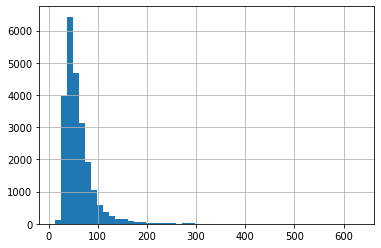

In [57]:
pd.Series(re_data['total_area']).hist(bins=50)

Оптимальную гистограмму получаем, используя 50 столбиков и ограничив данные (не более 200 кв.м., т.к. количество сделок по объектам с большей площадью минимально. Видим, что максимальное количество сделок приходится на диапазон от 30 до 75 кв.м. И скорее всего это объекты массовой застройки.

<AxesSubplot:>

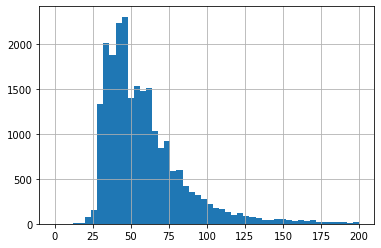

In [58]:
pd.Series(re_data['total_area']).hist(bins=50,range=(0,200))

Показатель цены.

<AxesSubplot:>

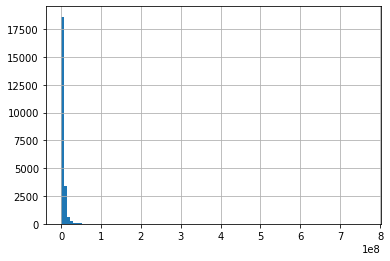

In [59]:
pd.Series(re_data['last_price']).hist(bins=100)

Оптимальную гистограмму получаем, используя 100 столбиков и ограничив диапазон цены (не более 20 млн. рублей, т.к. количество сделок по большим ценам составляет единичные случаи). Видим, что максимальное количество сделок приходится на диапазон от 2 млн. рублей до 7,5 млн. рублей.

<AxesSubplot:>

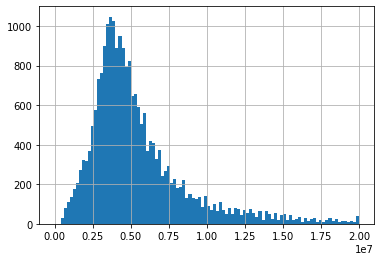

In [60]:
pd.Series(re_data['last_price']).hist(bins=100,range=(0,20000000))

Количество комнат:

<AxesSubplot:>

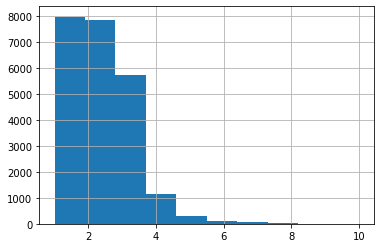

In [61]:
pd.Series(re_data['rooms']).hist(bins=10)

Так как на этапе предварительной обработки мы ограничили количество комнат от 1 до 10, то нам не нужно больше десяти столбцов. Видим, что максимальное количество сделок приходится на квартиры с количеством комнат от 1 до 3.

Высота потолков:

<AxesSubplot:>

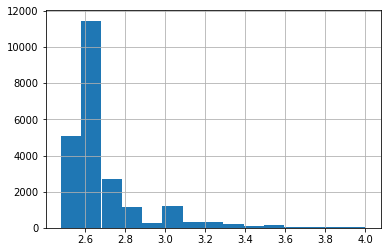

In [62]:
pd.Series(re_data['ceiling_height']).hist(bins=15)

Время продажи:

<AxesSubplot:>

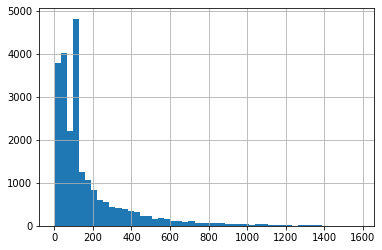

In [63]:
pd.Series(re_data['days_exposition']).hist(bins=50)

Максимальное количество сделок происходит в период до 600 дней. Сузим диапазон данных до этой величины

<AxesSubplot:>

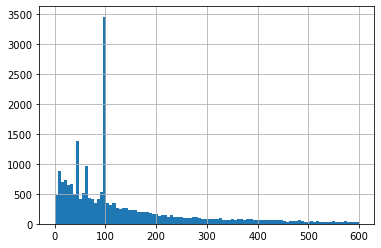

In [64]:
pd.Series(re_data['days_exposition']).hist(bins=100,range=(0,600) )

Четко видим на графике несколько выбросов. Исследуем их, используя метод .value_counts(). Видим, что это выбросы на 30, 90, 7,45, 60, 96 дней. Предполагаем, что это дни не продаж, а когда продавцы недовольные количеством обращений пересматривают объявления и публикуют их заново, или удаляют их. Поэтому всплески. Удалим их с графика.

In [65]:
print(re_data['days_exposition'].value_counts().head(20))

96    3179
45     860
60     533
7      226
30     202
90     199
4      171
3      153
5      148
14     142
9      141
20     137
44     136
8      135
11     132
10     126
18     126
13     123
22     122
21     122
Name: days_exposition, dtype: int64


<AxesSubplot:>

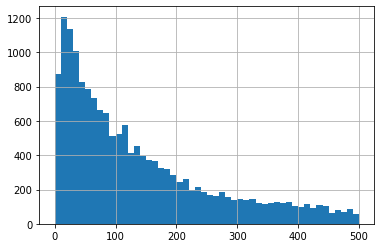

In [66]:
re_data_sel = re_data.query('days_exposition != 45 and days_exposition != 96 and days_exposition != 60 and days_exposition != 7 and days_exposition != 90 and days_exposition < 500 ')
pd.Series(re_data_sel['days_exposition']).hist(bins=50,range=(0,500))

<AxesSubplot:ylabel='Frequency'>

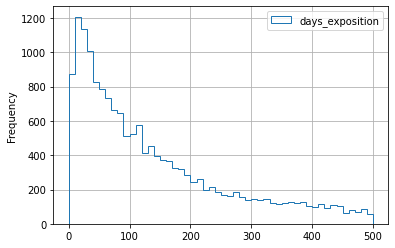

In [67]:
re_data_sel['days_exposition'].plot(kind='hist', histtype='step',bins=50,range=(0,500),grid=True,legend=True )

Видим, что основная часть сделок происходит в первые 100 дней. Далее их количество плавно убывает до 500 дней (это уже продавцы, которые никуда не торопятся, а желают получить нужную цену).

Рассчитаем среднее и медианное значение для количества дней продажи:

In [68]:
print ('Средняя длительность продажи:', re_data_sel['days_exposition'].mean())
print ('Медианная длительность продажи:', re_data_sel['days_exposition'].median())

Средняя длительность продажи: 135.8352948313516
Медианная длительность продажи: 97.0


Наш вывод таков, если квартира, продается быстрее чем за 100 дней - это быстро, если долее, то уже медленно. Хотя некоторые терпеливо ждут и полтора года.

In [69]:
print('Зависимость цены продажи квартиры от площади:', re_data_sel['last_price'].corr(re_data_sel['total_area']))
print('Зависимость цены продажи квартиры от числа комнат:', re_data_sel['last_price'].corr(re_data_sel['rooms']))
print('Зависимость цены продажи квартиры от удаленности от центра:', re_data_sel['last_price'].corr(re_data_sel['city_centers_nearest']))
print('Зависимость цены продажи квартиры от этажа:', re_data_sel['last_price'].corr(re_data_sel['floor']))
print('Зависимость цены продажи квартиры от дня недели размещения:', re_data_sel['last_price'].corr(re_data_sel['weekday_fde']))
print('Зависимость цены продажи квартиры от месяца размещения:', re_data_sel['last_price'].corr(re_data_sel['month_fde']))
print('Зависимость цены продажи квартиры от года размещения:', re_data_sel['last_price'].corr(re_data_sel['year_fde']))

Зависимость цены продажи квартиры от площади: 0.6016141994900988
Зависимость цены продажи квартиры от числа комнат: 0.3291465633538
Зависимость цены продажи квартиры от удаленности от центра: -0.16775856409470336
Зависимость цены продажи квартиры от этажа: 0.026657747960035134
Зависимость цены продажи квартиры от дня недели размещения: 0.0020063759911835115
Зависимость цены продажи квартиры от месяца размещения: -0.004342863510400709
Зависимость цены продажи квартиры от года размещения: -0.030716510505598


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

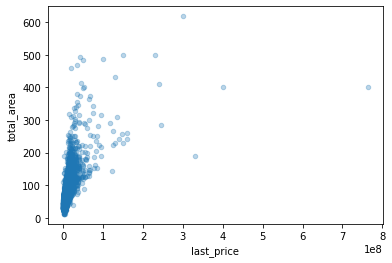

In [70]:
re_data_sel.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

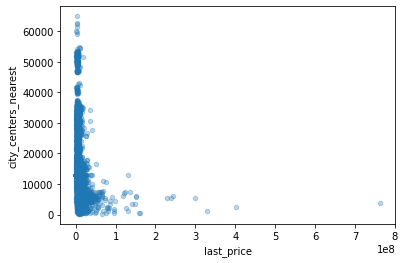

In [71]:
re_data_sel.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='rooms'>

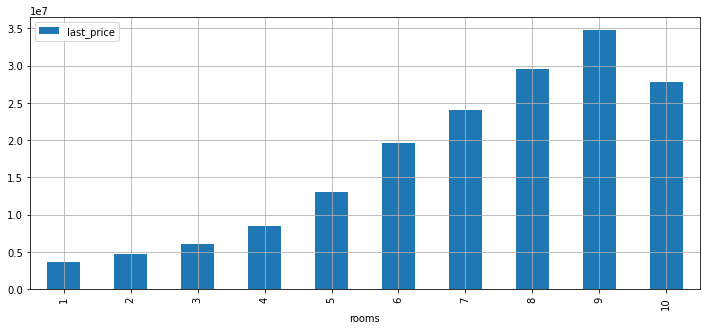

In [72]:
re_data_sel.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='floor'>

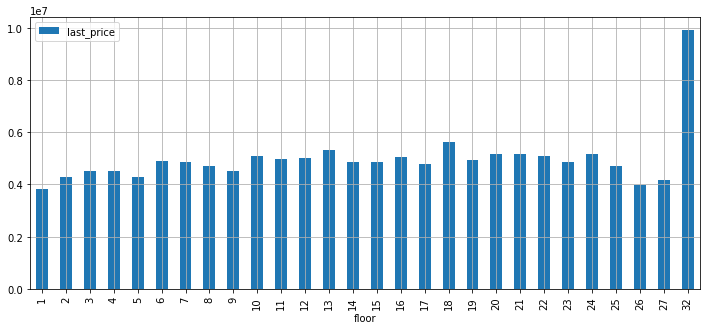

In [73]:
re_data_sel.pivot_table(index='floor', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='weekday_fde'>

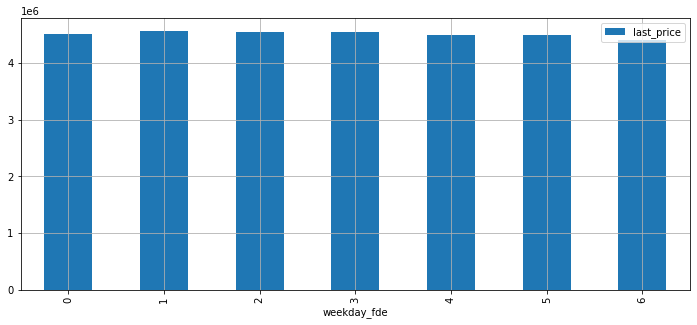

In [74]:
re_data_sel.pivot_table(index='weekday_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='month_fde'>

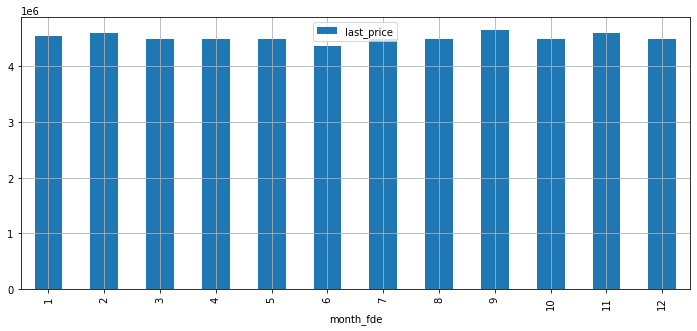

In [75]:
re_data_sel.pivot_table(index='month_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year_fde'>

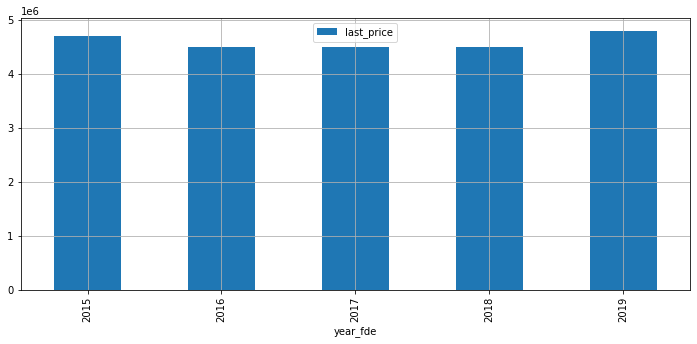

In [76]:
re_data_sel.pivot_table(index='year_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

Видим наличие выраженной зависимости между ценой квартиры и ее площадью. Незначительную зависимость между ценой квартиры и количеством комнат, слабую зависимость от удаленности от центра (но здесь данные взяты по общей выборке, где есть и малые города и даже деревни, где окраина или центр совсем не важно). Далее мы более пристально рассмотрим данные по Санкт-Петербургу и, возможно, там картина будет другой.В общей выборке отсутствует зависимость цены квартиры от этажа, дня недели размещения, месяца и года размещения.

Исследование зависимости от категории этажа. В данном случае нельзя посчитать корреляцию. И будем использовать диаграмму рассеяния. В результате видим, что препочтительными все же являются варианты "не первый и не последний". Затем выбирают последние этажи (бывают отличные квартиры с мансардными окнами). И только потом первый.

<AxesSubplot:xlabel='floor_classified'>

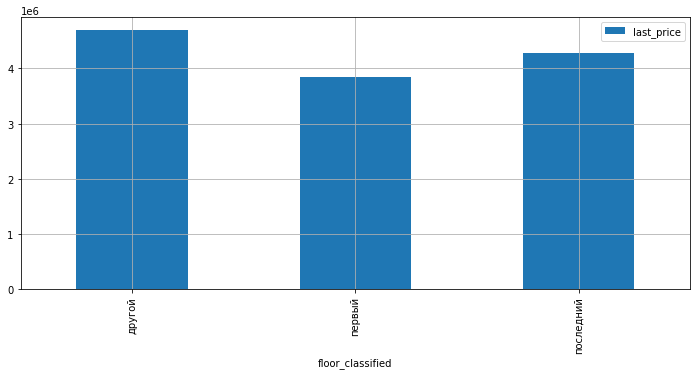

In [77]:
re_data_sel.pivot_table(index='floor_classified', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='last_price', ylabel='floor_classified'>

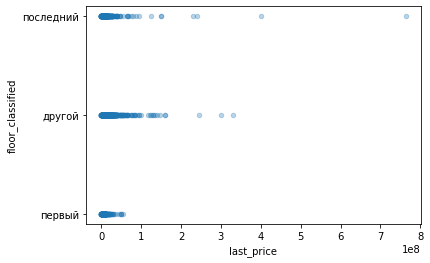

In [78]:
re_data_sel.plot(x='last_price', y='floor_classified', kind='scatter', alpha=0.3) 

Определим населенные пункты (10), в которых происходит максимальное количество сделок с недвижимостью, а также посчитаем для них средние цены квадратного метра. Для этого воспользуемся сводной таблицей.

In [79]:
re_data_pivot = re_data_sel.pivot_table(index='locality_name', values='price_sqm', aggfunc=['count','mean'])

re_data_pivot.columns = ['count', 'mean_sqm_price']

print(re_data_pivot.sort_values(by='count', ascending=False).head(15))

re_data_top = re_data_pivot.query('count >= 161')

print (re_data_top.sort_values(by='mean_sqm_price', ascending=False))


                         count  mean_sqm_price
locality_name                                 
Санкт-Петербург          11121   111101.880930
посёлок Мурино             440    85185.864644
посёлок Шушары             335    77495.297956
Всеволожск                 270    68509.709733
Колпино                    256    75098.334425
Пушкин                     252   102407.660100
посёлок Парголово          245    89587.126901
деревня Кудрово            220    92014.727846
Гатчина                    218    67488.578216
Выборг                     161    56881.075179
Петергоф                   143    82810.602057
Красное Село               133    72183.006923
Сестрорецк                 130   101273.510306
Кудрово                    117    97119.031606
деревня Новое Девяткино    103    75587.749409
                   count  mean_sqm_price
locality_name                           
Санкт-Петербург    11121   111101.880930
Пушкин               252   102407.660100
деревня Кудрово      220    92014.727

<AxesSubplot:xlabel='locality_name'>

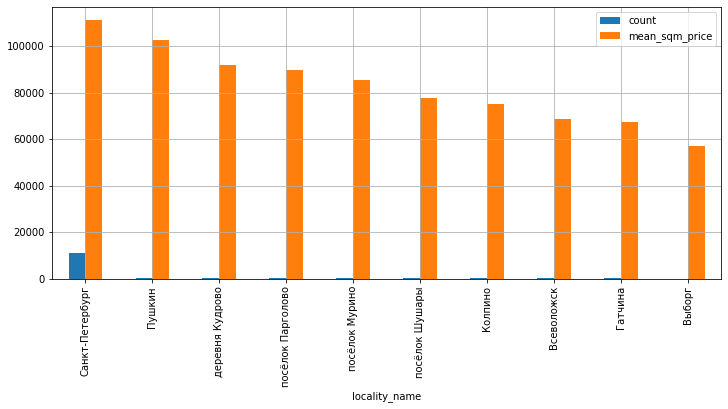

In [80]:
re_data_top.sort_values(by='mean_sqm_price', ascending=False).plot(kind='bar',grid=True, figsize=(12, 5))

Видим, что в топ-10 по количеству сделок максимальная средняя цена квадратного метра в Санкт-Петербурге, а минимальная в Выборге.

Определим центральную зону Санкт-Пербурга. Для удобства работы для начала сделаем срез данных, где будут строки, только о Санкт-Петербурге

In [81]:
re_data_spb = re_data_sel.loc[re_data_sel['locality_name'] == 'Санкт-Петербург']
re_data_spb=re_data_spb.reset_index(drop=True)
re_data_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          11121 non-null  int64         
 1   last_price            11121 non-null  float64       
 2   total_area            11121 non-null  float64       
 3   first_day_exposition  11121 non-null  datetime64[ns]
 4   rooms                 11121 non-null  int64         
 5   ceiling_height        11121 non-null  float64       
 6   floors_total          11121 non-null  int64         
 7   living_area           11121 non-null  float64       
 8   floor                 11121 non-null  int64         
 9   is_apartment          11121 non-null  bool          
 10  studio                11121 non-null  bool          
 11  open_plan             11121 non-null  bool          
 12  kitchen_area          11121 non-null  float64       
 13  balcony         

Расстояние до центра города в столбце 'city_centers_nearest' представлено в метрах. Переведем его в километры, разделив на 1000. Округлим их до целых чисел c использованием round() и поместим в отдельный столбец 'city_cent_int'

In [82]:
re_data_spb['city_centers_nearest'] = re_data_spb['city_centers_nearest']/1000


In [83]:
re_data_spb['city_cent_int']=re_data_spb['city_centers_nearest'].astype('int')


Посчитаем среднюю цену квадратного метра для каждого километра и построим график зависимости цены от расположения по отношению к центру.

<AxesSubplot:xlabel='city_cent_int'>

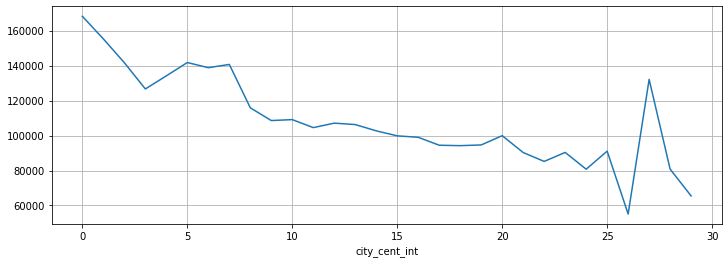

In [84]:
re_data_spb.groupby('city_cent_int')['price_sqm'].mean().plot(grid=True,figsize=(12, 4))

Из графика видим, что на 7 км от центра происходит заметный провал вниз. Далее идет плавное снижение (выброс в районе 27 км не интересен в рамках задачи. Возможно это престижные новостройки). Значит границы центра СПБ будем считать в пределах 7 км.

Сделаем выборку объектов, находящихся в центре, чтобы далее работать уже с ней.

In [85]:
spb_center = re_data_spb.query('city_cent_int <= 7')
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 11120
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          2363 non-null   int64         
 1   last_price            2363 non-null   float64       
 2   total_area            2363 non-null   float64       
 3   first_day_exposition  2363 non-null   datetime64[ns]
 4   rooms                 2363 non-null   int64         
 5   ceiling_height        2363 non-null   float64       
 6   floors_total          2363 non-null   int64         
 7   living_area           2363 non-null   float64       
 8   floor                 2363 non-null   int64         
 9   is_apartment          2363 non-null   bool          
 10  studio                2363 non-null   bool          
 11  open_plan             2363 non-null   bool          
 12  kitchen_area          2363 non-null   float64       
 13  balcony          

Исследуем показатели общей площади объектов, цены, числа комнат, потолков. Для этого построим гистограммы.

<AxesSubplot:>

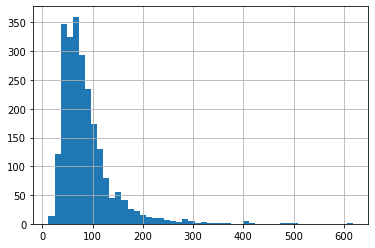

In [86]:
pd.Series(spb_center['total_area']).hist(bins=50)


<AxesSubplot:>

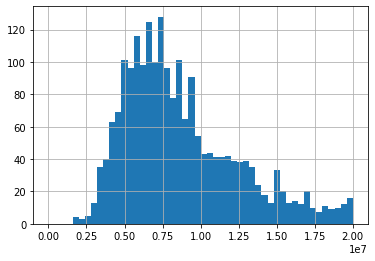

In [87]:
pd.Series(spb_center['last_price']).hist(bins=50, range = (0,20000000))

<AxesSubplot:>

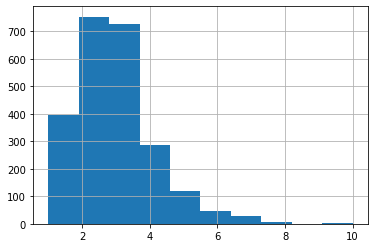

In [88]:
pd.Series(spb_center['rooms']).hist(bins=10)

<AxesSubplot:>

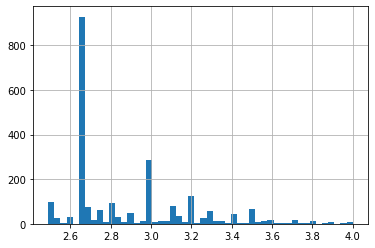

In [89]:
pd.Series(spb_center['ceiling_height']).hist(bins=50)

Видим, что значимая часть объектов обладает площадью от 50 до 75 кв.метров, что несколько выше средней по выборке. Диапазон цен в основном приходится на цены от 4 до 10 млн.рублей, что больше чем по общей выборке. В основном продаются 2,3 и 4 комнатные квартиры. Что касается высоты потолков, то основное количество с потолками 2.7 метра, как и в общем датафрейме, но значительное количество объектов имеет потолки в диапазоне от 3 до 3.5 метров.

Проанализируем, какие из факторов влияют на стоимость квартиры:площадь, число комнат, этаж (категория), удаленность от центра.

In [90]:
print('Зависимость цены продажи квартиры  в центре СПб от площади:', spb_center['last_price'].corr(spb_center['total_area']))
print('Зависимость цены продажи квартиры в центре СПб от числа комнат:', spb_center['last_price'].corr(spb_center['rooms']))
print('Зависимость цены продажи квартиры в центре СПб от удаленности от центра:', spb_center['last_price'].corr(spb_center['city_centers_nearest']))
print('Зависимость цены продажи квартиры в центре СПб от этажа:', spb_center['last_price'].corr(spb_center['floor']))
print('Зависимость цены продажи квартиры в центре СПб от дня недели размещения:', spb_center['last_price'].corr(spb_center['weekday_fde']))
print('Зависимость цены продажи квартиры в центре СПб от месяца размещения:', spb_center['last_price'].corr(spb_center['month_fde']))
print('Зависимость цены продажи квартиры в центре СПб от года размещения:', spb_center['last_price'].corr(spb_center['year_fde']))

Зависимость цены продажи квартиры  в центре СПб от площади: 0.5986003832166343
Зависимость цены продажи квартиры в центре СПб от числа комнат: 0.32129804995702926
Зависимость цены продажи квартиры в центре СПб от удаленности от центра: -0.05970777634704562
Зависимость цены продажи квартиры в центре СПб от этажа: 0.10014457858289444
Зависимость цены продажи квартиры в центре СПб от дня недели размещения: 0.016986856326236713
Зависимость цены продажи квартиры в центре СПб от месяца размещения: -0.018984692937016944
Зависимость цены продажи квартиры в центре СПб от года размещения: -0.04678395120150796


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

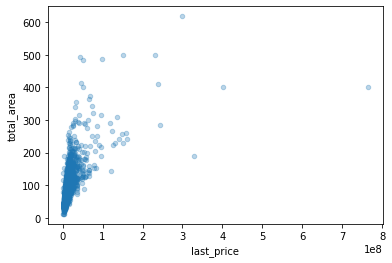

In [91]:
spb_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

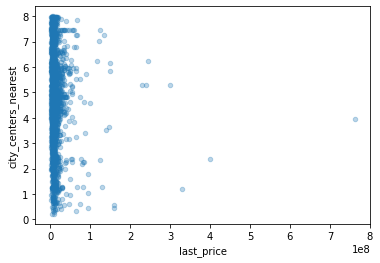

In [92]:
spb_center.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='rooms'>

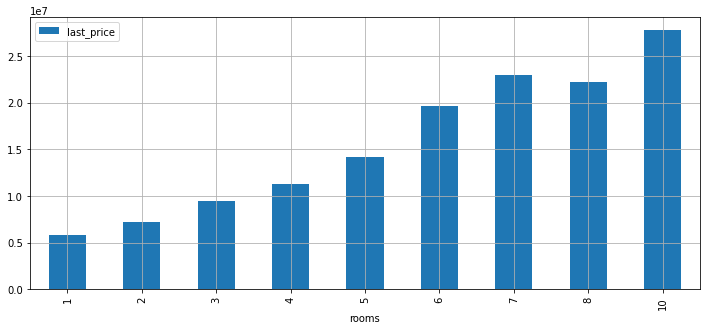

In [93]:
spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='floor'>

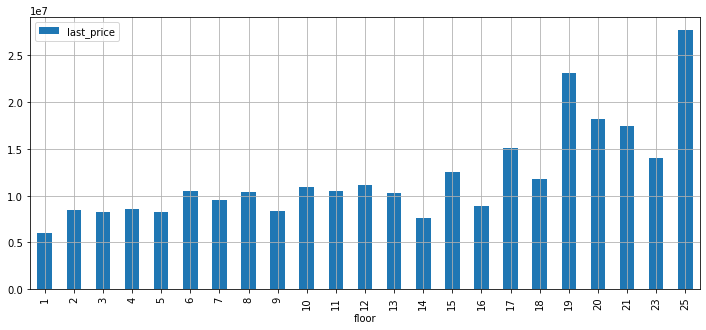

In [94]:
spb_center.pivot_table(index='floor', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='weekday_fde'>

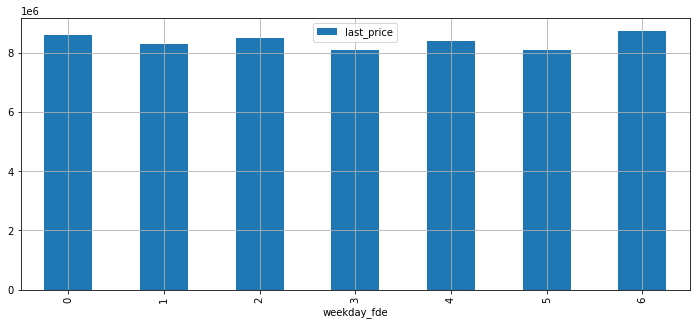

In [95]:
spb_center.pivot_table(index='weekday_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='month_fde'>

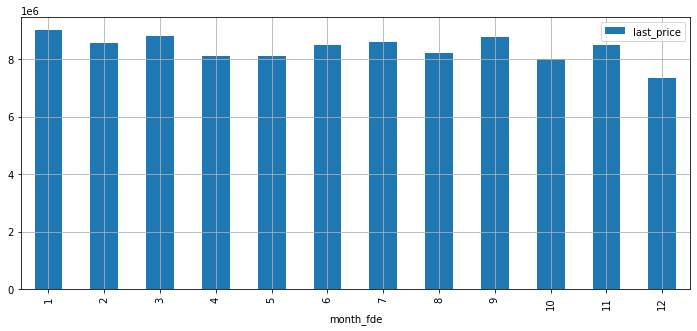

In [96]:
spb_center.pivot_table(index='month_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year_fde'>

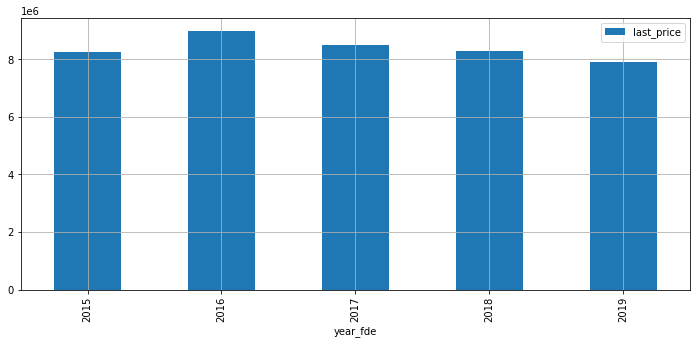

In [97]:
spb_center.pivot_table(index='year_fde', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

Степени зависимости цены продажи от показателей примерно такие же, как и в общей выборке.

<AxesSubplot:xlabel='floor_classified'>

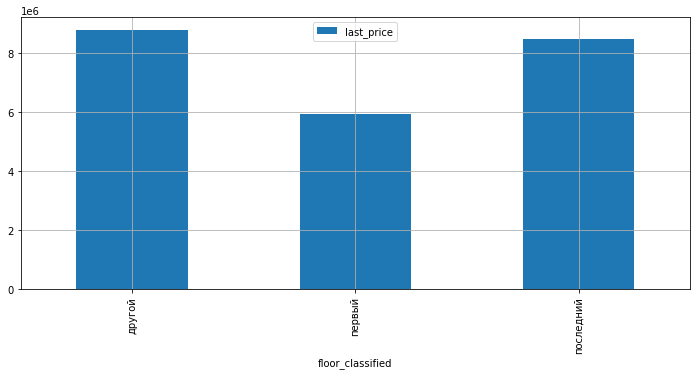

In [98]:
spb_center.pivot_table(index='floor_classified', values='last_price', aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))

Что касается зависимости от категории этажа, то здесь картина отличается от общего датафрейма. Покупатели явно предпочитают квартиры на этажах, кроме первого.

На этапе исследовательского анализа данных выявлено:

1. В общей выборке сделки проводились в основном с объектами площадью от 30 до 75 кв.м., с количеством комнат от 1 до 3, высотой потолков 2.48-2.6

2. Квартиры продаются в среднем за срок около 100 дней. 

3. Цена квартиры в общей выборке значительно зависит от площади, в меньшей степени от количества комнат и удаленности от центра и не зависит от этажа. Хотя при прочих равных предпочитают все же квартиры не на первом этаже.

4. Для центра Санкт-Петербурга зависимости от показателей из пункта 3 схожи.

5. Центральный район Санкт-Петербурга ограничен удаленностью от центра в 7 км.

6. Для центра Санкт-Петербурга сделки проводились в основном с объектами площадью от 50 до 75 кв.м., количеством комнат от 2 до 4, где высота потолков 2.7, либо 3-3.5 метров.

7. Наибольшее количество сделок проведено в: Санкт-Петербурге, Выборге, Пушкине, Всеволжске, Гатчине, Колпино, деревне Кудрово, посёлках Мурино, Шушары, Парголово. Максимальная цена квадратного метра в Санкт-Петербурге, минимальная в Выборге.

## Общий вывод
### Этапы работы над проектом:
1. Изучение файла данных.
2. Предобработка данных.
3. Расчеты и добавление результатов.
4. Исследовательский анализ данных.


### В ходе работы по этапам выполнены следующие работы и получены следующие результаты:
1. Изучение файла данных:
    1. В исходном дата фрейме 22 столбца и 23699 строк.
    2. Отсутствует часть данных в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony ,locality_name , airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_around3000, ponds_nearest, days_exposition. Необходимо провести заполнение.
    3. В столбце cityCenters_nearest, нужно изменить заголовок, чтобы привести его к корректному виду (в "змеиный регистр").
    4. В некоторых столбцах тип данных не соответствует смыслу этих данных:
        1. first_day_exposition  необходимо преобразовать к типу datatime.
        2. Данные в столбцах floors_total, balcony, days_exposition нужно привести к целочисленному типу. Эти данные не могут быть не целыми.
        3. Данные в столбце is_apartment нужно привести к типу bool. Квартира либо аппартаменты, либо нет.
    5. Так как данные столбцов airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_around3000, ponds_nearest далее в анализе и достижении целей проекта не используются, то принял решение их не заполнять.
    
    
2. Предобработка данных:
    1. На первом этапе обработки проработан столбец locality_name:
        1. Удалены незаполненный строки (названия восстановить невозомжно). 49 строк.
        2. Сделаны замены части текстов в значениях. Это позволило избавиться от скрытого дублирования.  Количество уникальных значений в столбце уменьшилось с 365 до 323.
    2. В столбце rooms сузили диапазон значений (стало от 1 до 10) отбросив варианты, по которым проходили явно единичные сделки.
    3. Для заполнения прочих столбцов (кроме is_apartment) составил функцию, которая заменяет значение в столбце на медианное по населенному пункту, а при отсутствии такой информации на медианное по всей выборке. Эта функция использована для столбцов ceiling_height, floors_total, living_area, kitchen_area, cityCenters_nearest.           
    4. В столбце ceiling_height отбросил явно аномальные значения: менее 2.48 (меньше, чем в хрущевках) и более 4м.
    5. В столбце floors_total отбросил строки, где количество этажей более 35 (в СПб и окрестностях таких зданий почти нет).
    6. В столбце is_apartment, заменили отсутствующие данные на False (если явно не заявлено, что объекты аппартаменты, значит он не аппартаменты).
    7. В столбце balcony отсутствующие данные заменили на 0 (если продавец не дал информацию о наличии балкона, значит его нет).
    8. Данные в столбце first_day_exposition приведены к типу datetime.
    9. Столбец cityCenters_nearest переименован в city_centers_nearest.
    10. Данные в столбцах floors_total, balcony, days_exposition приведены к целочисленному типу.
    11. Данные в столбце is_apartment после заполнения автоматически пришли к типу bool.
    12. После обработки, заполнения и чистки в датафрейме осталось 23200 строк. Удалено 499 строк, т.е. примерно 2%. Это не должно исказить результаты исследования.
    
3. Расчеты и добавление результатов. В соответствии с задачами на исследование:
    1. Добавлены столбцы weekday_fde, month_fde, year_fde, содержащие информацию о дне недели, месяце и годе размещения объявления.
    2. Добавлен столбец price_sqm, содержащий информацию о цене квадратного метра.
    3. Добавлены столбцы living_total_ratio, kitchen_total_ratio, содержащие информацию об отношении жилой площади к общей, и площади кухни к общей.
    4. С использованием функции для одной строки добавлен столбец floor_classified, категоризирующий данные по этажам: первый, последний, другой.
    
    
4. Исследовательский анализ данных. В соответствии с заданием на исследование выполнены следующие задачи:
    1. Для общего дата фрейма:
        1. Проанализированы параметры общей площади, высоты потолков, стоимости и количества дней экспозиции.
        2. Выведены среднее и медианное значение для дней продажи.
        3. Исследована зависимость цены объекта от катеригориальных (число комнат, этаж, день недели размещения, месяц размещения, год размещения, категория этажа) и количественных (площадь, расстояние до центра) параметров с использованием диаграмм рассеивания и столбчатых диграмм.
    2. Проведен поиск топ-10 населенных пунктов по количеству сделок. Составлена столбчатая диаграмма с медианными значениями цены.
    3. Составлена отдельная выборка по СПб. В ней 11121 строка.
    4. Путем исследования зависимости цены от расстояния до центра определен радиус городского центра СПб. 
    5. Для городского центра СПб:
        1. Проанализированы параметры общей площади, высоты потолков, стоимости и количества дней экспозиции.
        2. Выведены среднее и медианное значение для дней продажи.
        3. Исследована зависимость цены объекта от катеригориальных (число комнат, этаж, день недели размещения, месяц размещения, год размещения, категория этажа) и количественных (площадь, расстояние до центра) параметров с использованием диаграмм рассеивания и столбчатых диграмм.
        
        
### Выводы:
    - В ходе выполнения проекта рассмотрено наличие/отсутствие зависимости факторов, влияющих на цену объекта недвижимости по базе сделок региона Санкт-Петербурга. И центрального района самого Санкт-Петербурга (до 7 км от центра города).
    - Выявлено, что единственным показателем серьезно влияющим на цену объекта является его площадь. Зависимостей от количества комнат, этажа размещения, удаленности от центра и даты размещения не выявлено.
    - Установлено что по общей выборке основная часть сделок проводилась с квартирами площадью от 30 до 75 кв.м., с количеством комнат от 1 до 3 и высотой потолков от 2.48 до 2.6 метров.
    - Для центра Санкт-Петербурга: площадь от 50 до 75 кв.м., количество комнат 2-4, высота потолков 2.7 или 3-3.5.
    - В обеих выборках установлено, что первый этаж покупают дешевле (на 15-20%).
    - Кроме того, Наибольшее количество сделок проведено в: Санкт-Петербурге, Выборге, Пушкине, Всеволжске, Гатчине, Колпино, деревне Кудрово, посёлках Мурино, Шушары, Парголово. Максимальная цена квадратного метра в Санкт-Петербурге, минимальная в Выборге.